In [62]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
df = sns.load_dataset("diamonds")

In [64]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [65]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


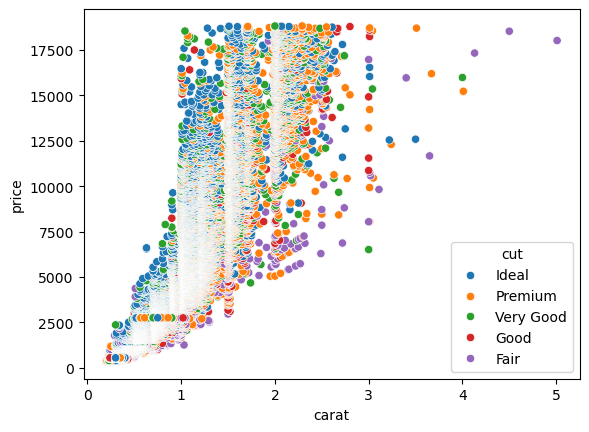

In [67]:
sns.scatterplot(x='carat', y='price', hue='cut', data=df)
plt.show()

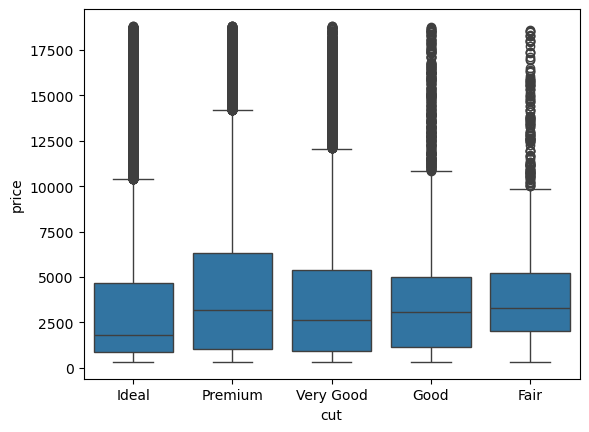

In [68]:
sns.boxplot(x='cut', y='price', data=df)
plt.show()

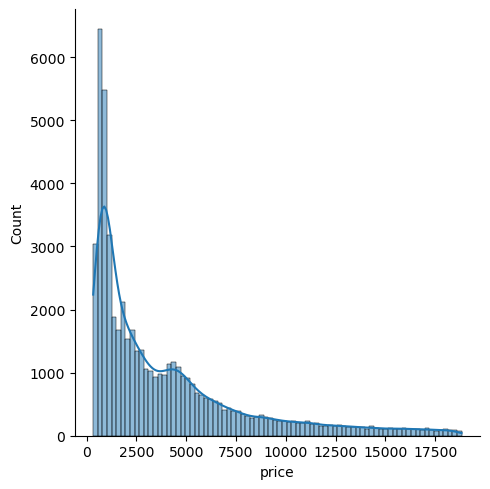

In [69]:
sns.displot(df['price'], kde=True)
plt.show()

In [70]:
df.groupby("cut").sum(numeric_only=True)

/tmp/ipykernel_90787/399629282.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("cut").sum(numeric_only=True)


,carat,depth,table,price,x,y,z
cut,,,,,,,
Ideal,15146.84,1329899.3,1205814.4,74513487,118691.07,118963.24,73304.61
Premium,12300.95,844901.1,810167.4,63221498,82385.88,81985.82,50297.49
Very Good,9742.70,746888.4,700226.2,48107623,69359.09,69713.45,43009.52
Good,4166.10,305967.0,287955.9,19275009,28645.08,28703.75,17855.42
Fair,1684.28,103107.1,95076.6,7017600,10057.50,9954.07,6412.26


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [72]:
cut = pd.get_dummies(df["cut"])
cut.sample()

,Ideal,Premium,Very Good,Good,Fair
28956,False,False,False,True,False


In [74]:
df = df.drop("cut", axis=1)
df = pd.concat([df, cut], axis=1)
df.sample()

,carat,color,clarity,depth,table,price,x,y,z,Ideal,Premium,Very Good,Good,Fair
36896,0.33,H,IF,60.5,56.0,959,4.54,4.52,2.74,True,False,False,False,False


In [76]:
color = pd.get_dummies(df["color"])
color.sample()

,D,E,F,G,H,I,J
45804,False,False,True,False,False,False,False


In [77]:
df = df.drop("color", axis=1)
df = pd.concat([df, color], axis=1)
df.sample()

,carat,clarity,depth,table,price,x,y,z,Ideal,Premium,Very Good,Good,Fair,D,E,F,G,H,I,J
242,1.01,SI2,62.7,59.0,2788,6.31,6.22,3.93,False,True,False,False,False,False,False,False,False,True,False,False


In [78]:
clarity = pd.get_dummies(df["clarity"])
clarity.sample()

,IF,VVS1,VVS2,VS1,VS2,SI1,SI2,I1
11585,False,False,False,False,False,True,False,False


In [79]:
df = df.drop("clarity", axis=1)
df = pd.concat([df, clarity], axis=1)
df.sample()

,carat,depth,table,price,x,y,z,Ideal,Premium,Very Good,...,I,J,IF,VVS1,VVS2,VS1,VS2,SI1,SI2,I1
29497,0.32,61.0,59.0,702,4.44,4.45,2.71,False,True,False,...,False,False,False,False,False,False,True,False,False,False


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 27 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   carat      53940 non-null  float64
 1   depth      53940 non-null  float64
 2   table      53940 non-null  float64
 3   price      53940 non-null  int64  
 4   x          53940 non-null  float64
 5   y          53940 non-null  float64
 6   z          53940 non-null  float64
 7   Ideal      53940 non-null  bool   
 8   Premium    53940 non-null  bool   
 9   Very Good  53940 non-null  bool   
 10  Good       53940 non-null  bool   
 11  Fair       53940 non-null  bool   
 12  D          53940 non-null  bool   
 13  E          53940 non-null  bool   
 14  F          53940 non-null  bool   
 15  G          53940 non-null  bool   
 16  H          53940 non-null  bool   
 17  I          53940 non-null  bool   
 18  J          53940 non-null  bool   
 19  IF         53940 non-null  bool   
 20  VVS1  

In [82]:
X = df[['carat', 'depth', 'table', 'Ideal', 'Premium', 'Very Good', 'Good', 'Fair',
             'D', 'E', 'F', 'G', 'H', 'I', 'J', 'IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']]
X

,carat,depth,table,Ideal,Premium,Very Good,Good,Fair,D,E,...,I,J,IF,VVS1,VVS2,VS1,VS2,SI1,SI2,I1
0,0.23,61.5,55.0,True,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
1,0.21,59.8,61.0,False,True,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
2,0.23,56.9,65.0,False,False,False,True,False,False,True,...,False,False,False,False,False,True,False,False,False,False
3,0.29,62.4,58.0,False,True,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,False
4,0.31,63.3,58.0,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,True,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
53936,0.72,63.1,55.0,False,False,False,True,False,True,False,...,False,False,False,False,False,False,False,True,False,False
53937,0.70,62.8,60.0,False,False,True,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
53938,0.86,61.0,58.0,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [84]:
Y = df[["price"]]
Y

,price
0,326
1,326
2,327
3,334
4,335
...,...
53935,2757
53936,2757
53937,2757
53938,2757


In [85]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=.25, random_state=30)

In [88]:
X_train

,carat,depth,table,Ideal,Premium,Very Good,Good,Fair,D,E,...,I,J,IF,VVS1,VVS2,VS1,VS2,SI1,SI2,I1
25203,1.52,62.4,58.0,False,False,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
16248,1.01,61.8,57.0,True,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
28185,0.40,61.7,58.0,False,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
41209,0.51,61.0,56.0,True,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
46452,0.52,61.8,58.0,False,True,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33268,0.30,62.6,54.0,True,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
44845,0.52,61.2,56.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
48045,0.51,61.9,55.0,True,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4517,1.00,64.0,59.0,False,False,False,True,False,True,False,...,False,False,False,False,False,False,False,False,True,False


In [89]:
y_train

,price
25203,13799
16248,6499
28185,666
41209,1205
46452,1774
...,...
33268,826
44845,1625
48045,1926
4517,3634


In [90]:
regressor = LinearRegression()

In [91]:
regressor.fit(X_train, y_train)

LinearRegression()

In [94]:
predictions = regressor.predict(X_test)
print(predictions)
print(y_test)

[[ 9712.5 ]
 [10750.5 ]
 [ 3412.  ]
 ...
 [ 1021.75]
 [ -540.  ]
 [ 6376.25]]
       price
21602   9702
24463  12730
1830    3060
11573   5038
29506    702
...      ...
26368    645
18017   7289
39706   1089
27758    648
15178   6097

[13485 rows x 1 columns]


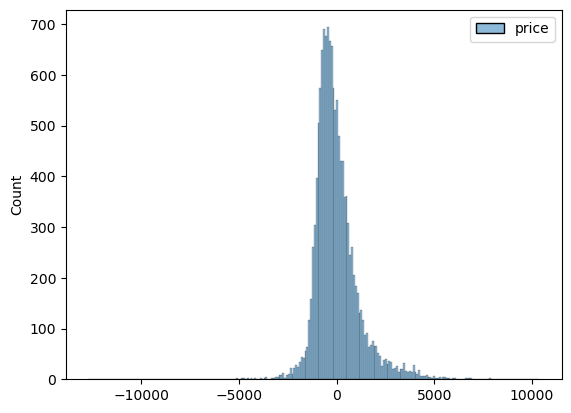

In [93]:
sns.histplot(y_test-predictions)
plt.show()

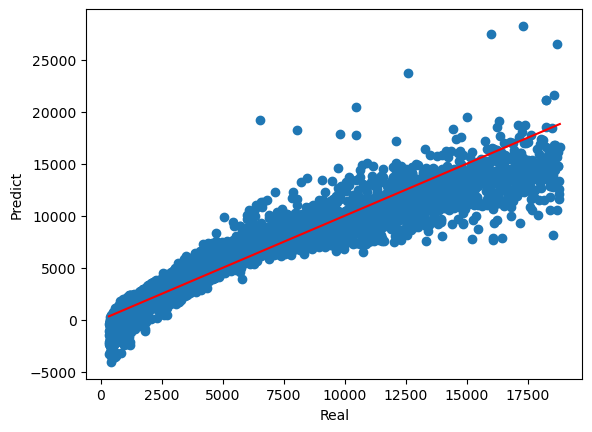

In [95]:
plt.scatter(x=y_test, y=predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r-')
plt.xlabel('Real')
plt.ylabel('Predict')
plt.show()

In [97]:
print("mae :" ,metrics.mean_absolute_error(y_test, predictions))
print("mse :" ,metrics.mean_squared_error(y_test, predictions))
print("rmse :" ,np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print("r2 :" ,metrics.r2_score(y_test, predictions))

mae : 809.9612161661105
mse : 1379229.6148220245
rmse : 1174.4060689650853
r2 : 0.9146809273731619


In [98]:
X.head()

,carat,depth,table,Ideal,Premium,Very Good,Good,Fair,D,E,...,I,J,IF,VVS1,VVS2,VS1,VS2,SI1,SI2,I1
0,0.23,61.5,55.0,True,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
1,0.21,59.8,61.0,False,True,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
2,0.23,56.9,65.0,False,False,False,True,False,False,True,...,False,False,False,False,False,True,False,False,False,False
3,0.29,62.4,58.0,False,True,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,False
4,0.31,63.3,58.0,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,True,False


In [99]:
new_data = np.array([
    [0.7, 61.5, 57.0,  # carat, depth, table
     True, False, False, False, False,  # cut: Ideal
     False, True, False, False, False, False, False,  # color: E
     False, False, False, True, False, False, False, False]  # clarity: VS1
])
columns = ['carat', 'depth', 'table', 'Ideal', 'Premium', 'Very Good', 'Good', 'Fair',
           'D', 'E', 'F', 'G', 'H', 'I', 'J', 'IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']
new_data_df = pd.DataFrame(new_data, columns=columns)
print(new_data_df)


   carat  depth  table  Ideal  Premium  Very Good  Good  Fair    D    E  ...  \
0    0.7   61.5   57.0    1.0      0.0        0.0   0.0   0.0  0.0  1.0  ...   

     I    J   IF  VVS1  VVS2  VS1  VS2  SI1  SI2   I1  
0  0.0  0.0  0.0   0.0   0.0  1.0  0.0  0.0  0.0  0.0  

[1 rows x 23 columns]


In [100]:
regressor.predict(new_data_df)

array([[4163.5]])